### Visualizing the distribution of the observations

### Load the required libraries

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import urllib
import math
%pylab inline

import findspark
findspark.init()

from pyspark import SparkContext
#sc.stop()
sc = SparkContext(master="local[3]",pyFiles=['lib/numpy_pack.py','lib/spark_PCA.py','lib/computeStats.py'])

from pyspark import SparkContext
from pyspark.sql import *
sqlContext = SQLContext(sc)

import sys
sys.path.append('./lib')

import numpy as np
from numpy_pack import packArray,unpackArray
from spark_PCA import computeCov
from computeStats import computeOverAllDist, STAT_Descriptions

############------------^^boilerplate code^^-------------##############

### Read the data frame from pickle file

data_dir='../../Data/Weather'
file_index='BSSSBSBS' # added BSSSBSBS for A08001117

from pickle import load

#read statistics
filename=data_dir+'/STAT_%s.pickle'%file_index
STAT,STAT_Descriptions = load(open(filename,'rb'))
print 'keys from STAT=',STAT.keys()

#read data
filename=data_dir+'/US_Weather_%s.parquet'%file_index

df=sqlContext.read.parquet(filename)
print df.count()
df.show(5)

Populating the interactive namespace from numpy and matplotlib
keys from STAT= ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']
12249
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|elevation|latitude|longitude|measurement|    station|undefs|              vector|  year|   label|
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|     14.9| 30.4132| -86.6635|       PRCP|US1FLOK0014|    38|[00 00 00 00 B0 5...|2009.0|BSSSBSBS|
|      6.4| 30.2119| -85.6828|       TMAX|USW00003882|     5|[40 5A F0 5A 80 5...|1999.0|BSSSBSBS|
|      6.4| 30.2119| -85.6828|       TMAX|USW00003882|     3|[20 5B 78 5B 48 5...|2000.0|BSSSBSBS|
|      6.4| 30.2119| -85.6828|       TMAX|USW00003882|    40|[90 55 E0 54 A0 5...|2001.0|BSSSBSBS|
|      6.4| 30.2119| -85.6828|       TMAX|USW00003882|    12|[E0 54 30 54 30 5...|2002.0|BSSSBSBS|
+---------+--------+---------+-----------+-----------+------+-------------

In [64]:
stations = df.select('station').distinct().rdd.map(lambda x: x[0]).collect()
print len(stations)
print stations[0:10]

177
[u'USW00063899', u'USC00013255', u'USC00013251', u'US1FLWT0002', u'USR0000FNAV', u'USC00228382', u'US1ALMB0018', u'US1ALMB0037', u'USC00081388', u'USW00003882']


In [69]:
s = df.toPandas()['latitude'].value_counts()
print len(s)
print s

177
USC00011084    497
USC00082220    489
USC00016988    487
USC00010583    460
USC00012813    450
USC00010252    389
USC00086240    384
USC00012758    383
USC00011566    348
USC00085793    347
USC00226718    331
USW00013894    325
USW00013899    312
USW00003855    288
USC00013105    286
USC00011803    283
USC00010402    270
USW00093841    263
USC00086842    236
USC00012675    220
USC00013251    211
USC00012172    207
USC00011080    203
USC00014193    203
USC00018637    189
USC00015483    188
USC00013255    185
USC00012577    185
USC00011807    157
USC00011685    137
              ... 
US1ALMB0015      2
US1ALMB0014      2
US1FLOK0013      2
US1ALMB0017      2
US1ALMB0056      2
US1ALBW0013      2
US1ALBW0058      2
US1ALBW0040      2
US1FLWT0013      2
US1FLES0013      2
US1FLSR0016      2
US1FLSR0012      2
US1FLWS0001      2
USC00016942      2
US1ALMB0050      2
US1FLWT0002      2
US1FLSR0008      2
US1ALMB0035      1
US1FLOK0014      1
US1ALBW0059      1
US1ALMB0042      1
US1ALBW0

In [73]:
print df.toPandas()['latitude'].max()
print df.toPandas()['latitude'].min()
print df.toPandas()['longitude'].max()
print df.toPandas()['longitude'].min()

31.5253
30.0667
-85.5824
-88.5


In [58]:
# print type(STAT)
# print type(STAT_Descriptions)
# print type(df)

# print len(STAT)
# print len(STAT_Descriptions)
# print df.count()


# print len(STAT['TMAX'])
# print STAT.keys()
print STAT['TMAX']['Mean']
# print STAT['TMIN'].keys()

# print '-'*50
# for desc in STAT_Descriptions:
#     print desc


[ 166.38580247  162.26619072  161.28193384  159.05699746  159.0025227
  165.12525253  166.4237544   161.34308779  158.96718829  158.497733
  153.82249117  153.3638664   156.00050429  158.08375378  162.41961577
  159.42497482  155.58425832  164.91603821  164.49647177  157.36464646
  159.74974874  165.75377644  168.04579768  162.41587142  165.15345785
  171.03863522  170.44371859  167.48922306  171.86231156  170.49571788
  169.18970737  170.89028686  170.49250749  166.82473711  165.8755
  168.73836918  171.09368737  166.7346019   166.128       173.0683974
  176.18109055  175.64864865  170.65813253  171.80230808  180.58        187.234
  184.42735896  180.90395198  182.97491219  185.49974987  189.17576365
  193.64196294  193.09754877  189.75137569  191.05321285  191.52326163
  190.73363318  192.69238477  195.65692695  195.16700201  196.16742081
  199.07207207  194.80381335  196.99849624  201.9238477   202.59798995
  200.15148465  204.29030638  209.38986453  210.54281422  216.004004
  216.8

### Select data for a particular station and measurement type

In [75]:
sqlContext.registerDataFrameAsTable(df,'weather')
Query="SELECT * FROM weather\n\tWHERE measurement='%s' and station='%s'"%('TMAX','USC00011084')
print Query
df1 = sqlContext.sql(Query)
print df1.count(),'rows'
df1.show(2)
rows=df1.rdd.map(lambda row:unpackArray(row['vector'],np.float16)).collect()
T=np.vstack(rows)
T=T/10.  # scaling to make the temperature be in centingrates
shape(T)

SELECT * FROM weather
	WHERE measurement='TMAX' and station='USC00011084'
84 rows
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|elevation|latitude|longitude|measurement|    station|undefs|              vector|  year|   label|
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|     25.9| 31.0583|  -87.055|       TMAX|USC00011084|    20|[00 7E 00 7E 00 7...|1926.0|BSSSBSBS|
|     25.9| 31.0583|  -87.055|       TMAX|USC00011084|     6|[A0 57 E0 58 20 5...|1927.0|BSSSBSBS|
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
only showing top 2 rows



(84, 365)

### Script for plotting yearly plots

In [ ]:
# keys from STAT= ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']

In [97]:
print 

<type 'numpy.ndarray'>


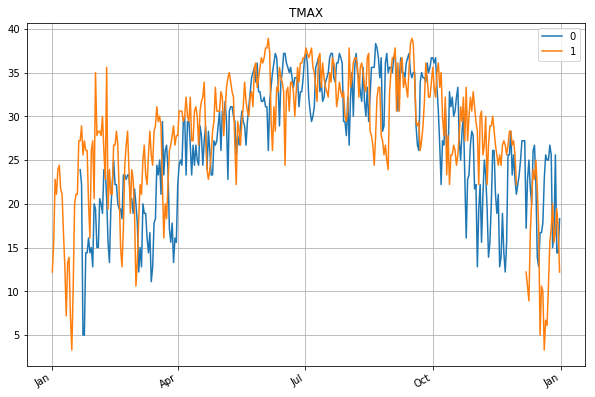

In [81]:
from YearPlotter import YearPlotter
fig, ax = plt.subplots(figsize=(10,7));
YP=YearPlotter()
YP.plot(T[:2,:].transpose(),fig,ax,title='TMAX')
#title('A sample of graphs');

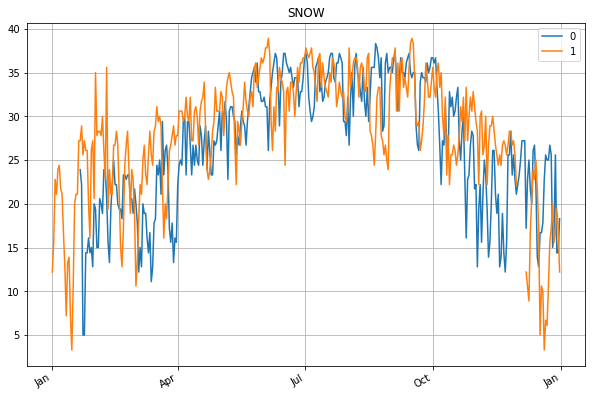

In [89]:
from YearPlotter import YearPlotter
fig, ax = plt.subplots(figsize=(10,7));
YP=YearPlotter()
YP.plot(T[:2,:].transpose(),fig,ax,title='SNOW')
#title('A sample of graphs');

### Distribution of missing observations
The distribution of missing observations is not uniform throughout the year. We visualize it below.

In [5]:
def plot_pair(pair,func):
    j=0
    fig,X=subplots(1,2,figsize=(16,6))
    axes=X.reshape(2)
    for m in pair:
        axis = axes[j]
        j+=1
        func(m,fig,axis)
        
def plot_valid(m,fig,axis):
    valid_m=STAT[m]['NE']
    YP.plot(valid_m,fig,axis,title='valid-counts '+m)
    

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


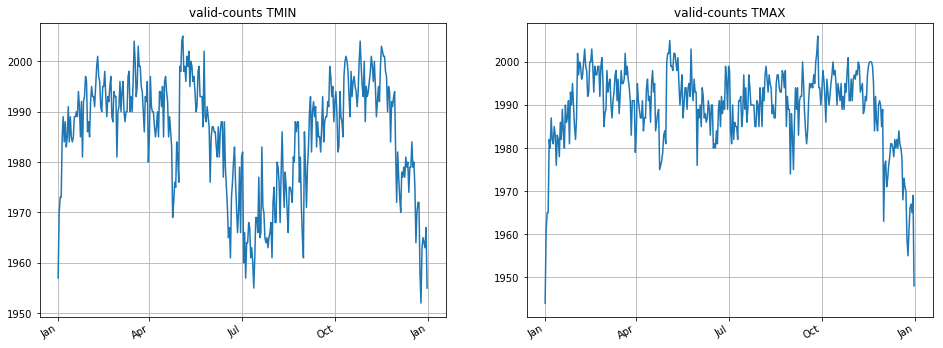

In [6]:
plot_pair(['TMIN','TMAX'],plot_valid)

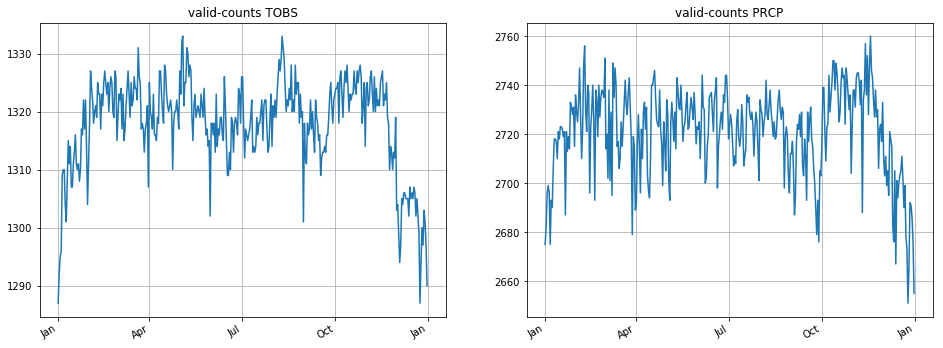

In [7]:
plot_pair(['TOBS','PRCP'],plot_valid)

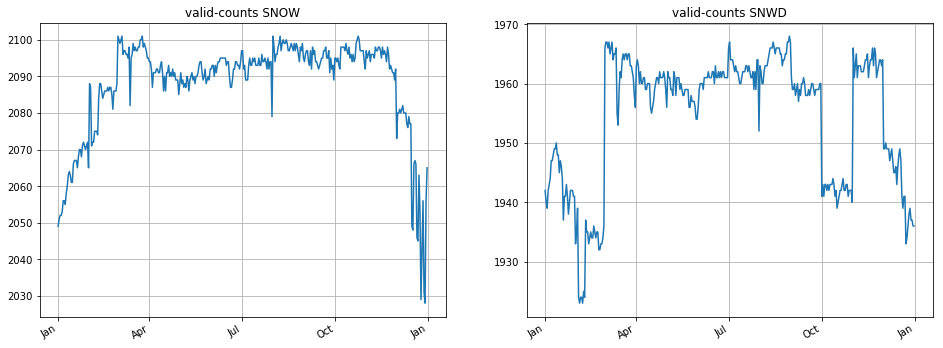

In [8]:
plot_pair(['SNOW', 'SNWD'],plot_valid)

### Plots of mean and std of observations

In [9]:
def plot_mean_std(m,fig,axis):
    mean=STAT[m]['Mean']
    std=np.sqrt(STAT[m]['Var'])
    graphs=np.vstack([mean-std,mean,mean+std]).transpose()
    YP.plot(graphs,fig,axis,title='Mean+-std   '+m)

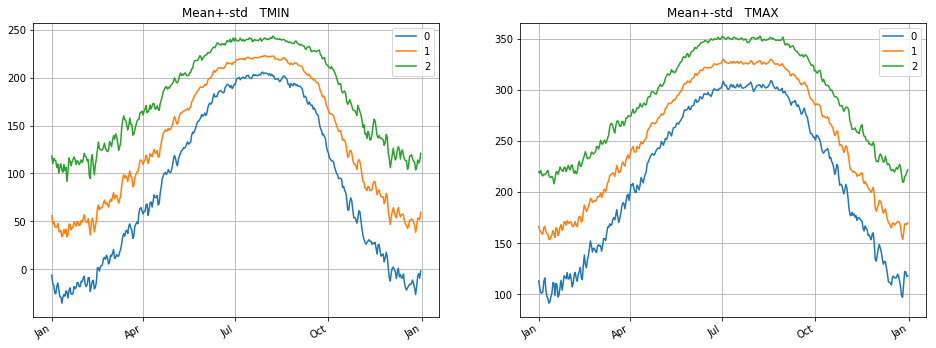

In [10]:
plot_pair(['TMIN','TMAX'],plot_mean_std)

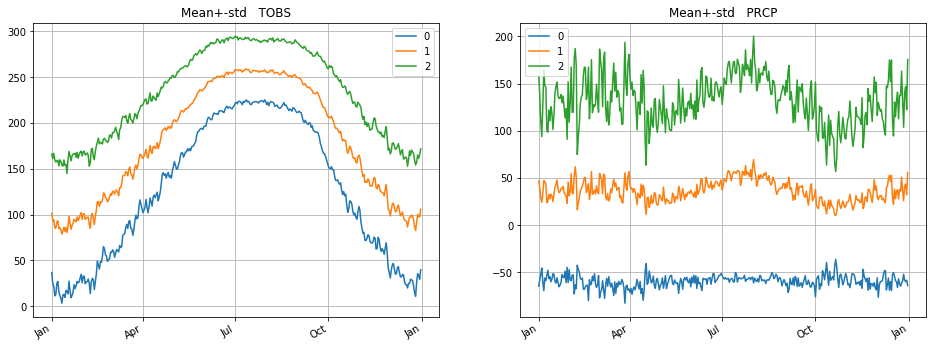

In [11]:
plot_pair(['TOBS','PRCP'],plot_mean_std)

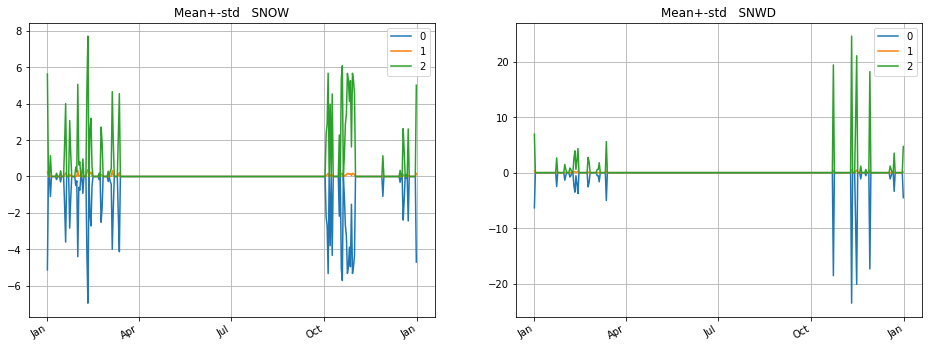

In [12]:
plot_pair(['SNOW', 'SNWD'],plot_mean_std)

### plotting top 3 eigenvectors

In [13]:
def plot_eigen(m,fig,axis):
    EV=STAT[m]['eigvec']
    YP.plot(EV[:,:3],fig,axis,title='Top Eigenvectors '+m)

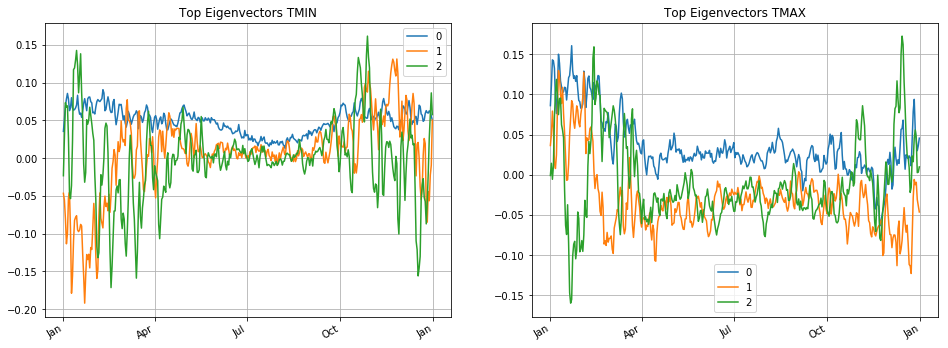

In [14]:
plot_pair(['TMIN','TMAX'],plot_eigen)

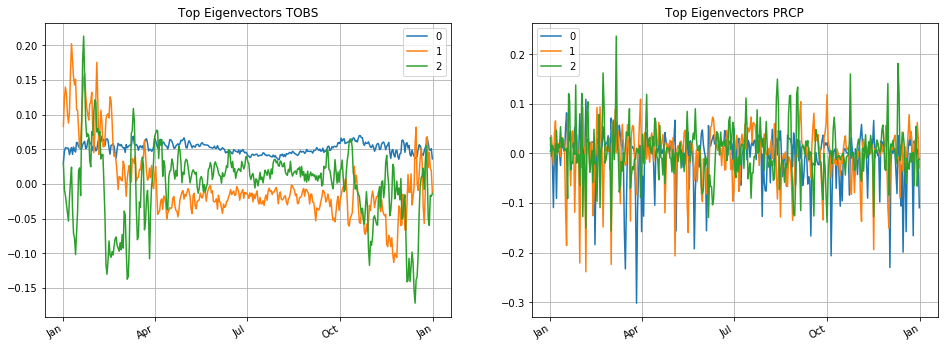

In [15]:
plot_pair(['TOBS','PRCP'],plot_eigen)

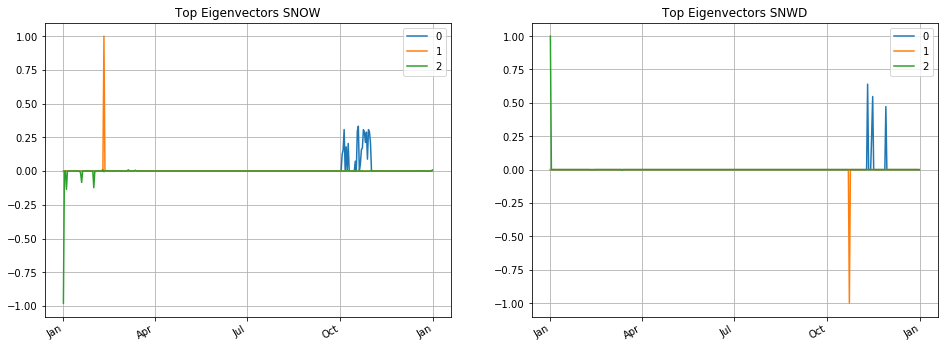

In [16]:
plot_pair(['SNOW', 'SNWD'],plot_eigen)

### Script for plotting percentage of variance explained

In [17]:
def pltVarExplained(j):
    subplot(1,3,j)
    EV=STAT[m]['eigval']
    k=5
    plot(([0,]+list(cumsum(EV[:k])))/sum(EV))
    title('Percentage of Variance Explained for '+ m)
    ylabel('Percentage of Variance')
    xlabel('# Eigenvector')
    grid()
    

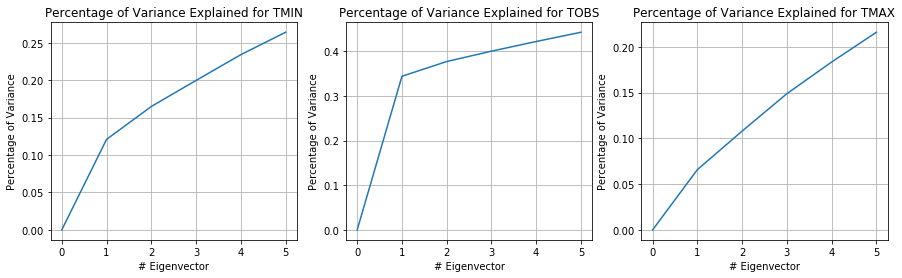

In [18]:
f=plt.figure(figsize=(15,4))
j=1
for m in ['TMIN', 'TOBS', 'TMAX']: #,
    pltVarExplained(j)
    j+=1

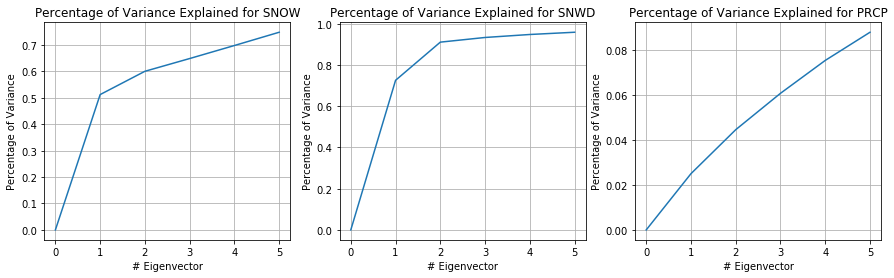

In [19]:
f=plt.figure(figsize=(15,4))
j=1
for m in ['SNOW', 'SNWD', 'PRCP']:
    pltVarExplained(j)
    j+=1 

In [19]:
#sc.stop()